In [1]:
import pandas as pd
import torch

In [2]:
df=pd.read_csv('bigData_V5.csv',sep=';',encoding='cp1252',decimal=',')

In [3]:
df.head()

,id,periodid,startdate,enddate,isGk,isShared,isUsn,isEnvd,isBudget,employeerQNew,...,mainSystem1420,mainSystem1421,mainSystem1422,mainSystem1423,mainSystem1424,mainSystem1425,mainSystem1426,mainSystem1427,mainSystem1428,notMainSystem
0,3,20861,01.04.2017 0:00,30.04.2017 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
1,3,20862,01.05.2017 0:00,31.05.2017 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
2,3,20864,01.06.2017 0:00,30.06.2017 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
3,3,20865,01.07.2017 0:00,31.07.2017 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1
4,3,20866,01.08.2017 0:00,31.08.2017 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df.tail()

,id,periodid,startdate,enddate,isGk,isShared,isUsn,isEnvd,isBudget,employeerQNew,...,mainSystem1420,mainSystem1421,mainSystem1422,mainSystem1423,mainSystem1424,mainSystem1425,mainSystem1426,mainSystem1427,mainSystem1428,notMainSystem
107749,1699864,23244,01.02.2020 0:00,29.02.2020 0:00,0,1,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
107750,1699870,23244,01.02.2020 0:00,29.02.2020 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
107751,1699875,23243,01.01.2020 0:00,31.01.2020 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
107752,1699875,23244,01.02.2020 0:00,29.02.2020 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
107753,1699879,23244,01.02.2020 0:00,29.02.2020 0:00,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['enddate'] = pd.to_datetime(df.enddate, format='%d.%m.%Y %H:%M')
df['startdate']= pd.to_datetime(df.startdate, format='%d.%m.%Y %H:%M')
df['paid_time']= (pd.to_datetime(df.paidDate, format='%d.%m.%Y %H:%M')-df.startdate).dt.days
Nov=pd.Timestamp('2019-11-01 00:00:00')
Jan=pd.Timestamp('2020-01-01 00:00:00')
Feb=pd.Timestamp('2020-02-01 00:00:00')
df=df[df.startdate<Jan]
df['last_month']=df.groupby(['id'])['startdate'].transform(max)
df['prev_last_month']=df.last_month-pd.DateOffset(months=1)
df['prev_prev_last_month']=df.last_month-pd.DateOffset(months=2)

In [6]:
Nov=pd.Timestamp('2019-11-01 00:00:00')
Jan=pd.Timestamp('2020-01-01 00:00:00')
Feb=pd.Timestamp('2020-02-01 00:00:00')
df=df[df.startdate!=Jan]
df=df[df.startdate!=Feb]
df.tail()

,id,periodid,startdate,enddate,isGk,isShared,isUsn,isEnvd,isBudget,employeerQNew,...,mainSystem1424,mainSystem1425,mainSystem1426,mainSystem1427,mainSystem1428,notMainSystem,paid_time,last_month,prev_last_month,prev_prev_last_month
107721,1696463,21710,2019-12-01,2019-12-31,0,0,0,0,0,NaN,...,0,0,0,0,0,1,-45.0,2019-12-01,2019-11-01,2019-10-01
107732,1697661,21710,2019-12-01,2019-12-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,8.0,2019-12-01,2019-11-01,2019-10-01
107735,1697684,21710,2019-12-01,2019-12-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,-25.0,2019-12-01,2019-11-01,2019-10-01
107738,1697763,21710,2019-12-01,2019-12-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,3.0,2019-12-01,2019-11-01,2019-10-01
107741,1697964,21710,2019-12-01,2019-12-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,25.0,2019-12-01,2019-11-01,2019-10-01


In [7]:
df.id.nunique()
unique_id=df.id.unique()

In [8]:
len(unique_id)

4132

In [9]:
for id in unique_id:
#     if df.loc[df.id==id].shape[0]<3 or df.loc[(df.id==id)&(df.startdate==Nov)].shape[0]==0:
    if df.loc[(df.id==id)&(df.startdate>=Nov-pd.Timedelta(days=95))&(df.startdate<=Nov)].shape[0]<4:
        df=df[df.id!=id]

In [10]:
df.id.nunique()
unique_id=df.id.unique()
len(unique_id)

2744

In [11]:
df

,id,periodid,startdate,enddate,isGk,isShared,isUsn,isEnvd,isBudget,employeerQNew,...,mainSystem1424,mainSystem1425,mainSystem1426,mainSystem1427,mainSystem1428,notMainSystem,paid_time,last_month,prev_last_month,prev_prev_last_month
9,29,20860,2017-02-01,2017-02-28,0,1,0,0,0,NaN,...,0,0,0,0,0,1,26.0,2019-12-01,2019-11-01,2019-10-01
10,29,19608,2017-03-01,2017-03-31,0,1,0,0,0,NaN,...,0,0,0,0,0,1,27.0,2019-12-01,2019-11-01,2019-10-01
11,29,20861,2017-04-01,2017-04-30,0,1,0,0,0,NaN,...,0,0,0,0,0,1,26.0,2019-12-01,2019-11-01,2019-10-01
12,29,20862,2017-05-01,2017-05-31,0,1,0,0,0,NaN,...,0,0,0,0,0,1,29.0,2019-12-01,2019-11-01,2019-10-01
13,29,20864,2017-06-01,2017-06-30,0,1,0,0,0,NaN,...,0,0,0,0,0,1,26.0,2019-12-01,2019-11-01,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107660,1692840,21706,2019-08-01,2019-08-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0.0,2019-12-01,2019-11-01,2019-10-01
107661,1692840,21707,2019-09-01,2019-09-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,-31.0,2019-12-01,2019-11-01,2019-10-01
107662,1692840,21708,2019-10-01,2019-10-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,-61.0,2019-12-01,2019-11-01,2019-10-01
107663,1692840,21709,2019-11-01,2019-11-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,-92.0,2019-12-01,2019-11-01,2019-10-01


In [12]:
client_data=df.groupby('id',as_index=False).agg({'startdate':'max'}).rename({'startdate':'last_month'},axis=1)
df['last_month']=df.groupby(['id'])['startdate'].transform(max)
df['prev_last_month']=df.last_month-pd.DateOffset(months=1)
df['prev_prev_last_month']=df.last_month-pd.DateOffset(months=2)

In [13]:
end_of_time=max(df.last_month)
end_of_time

Timestamp('2019-12-01 00:00:00')

In [14]:
client_data['is_gone']=(client_data.last_month!=end_of_time)
client_data.groupby('is_gone').count()

,id,last_month
is_gone,,
False,2720,2720
True,24,24


In [15]:
client_data.loc[client_data.is_gone==True]

,id,last_month,is_gone
190,6467,2019-11-01,True
217,6877,2019-11-01,True
472,9365,2019-11-01,True
487,9483,2019-11-01,True
583,10540,2019-11-01,True
619,11502,2019-11-01,True
742,14137,2019-11-01,True
853,16951,2019-11-01,True
941,18181,2019-11-01,True
1037,20703,2019-11-01,True


In [16]:
excepted_columns=['id','paidDate','startdate','enddate','last_month','prev_last_month','periodid','prev_prev_last_month']

In [17]:
df

,id,periodid,startdate,enddate,isGk,isShared,isUsn,isEnvd,isBudget,employeerQNew,...,mainSystem1424,mainSystem1425,mainSystem1426,mainSystem1427,mainSystem1428,notMainSystem,paid_time,last_month,prev_last_month,prev_prev_last_month
9,29,20860,2017-02-01,2017-02-28,0,1,0,0,0,NaN,...,0,0,0,0,0,1,26.0,2019-12-01,2019-11-01,2019-10-01
10,29,19608,2017-03-01,2017-03-31,0,1,0,0,0,NaN,...,0,0,0,0,0,1,27.0,2019-12-01,2019-11-01,2019-10-01
11,29,20861,2017-04-01,2017-04-30,0,1,0,0,0,NaN,...,0,0,0,0,0,1,26.0,2019-12-01,2019-11-01,2019-10-01
12,29,20862,2017-05-01,2017-05-31,0,1,0,0,0,NaN,...,0,0,0,0,0,1,29.0,2019-12-01,2019-11-01,2019-10-01
13,29,20864,2017-06-01,2017-06-30,0,1,0,0,0,NaN,...,0,0,0,0,0,1,26.0,2019-12-01,2019-11-01,2019-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107660,1692840,21706,2019-08-01,2019-08-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,0.0,2019-12-01,2019-11-01,2019-10-01
107661,1692840,21707,2019-09-01,2019-09-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,-31.0,2019-12-01,2019-11-01,2019-10-01
107662,1692840,21708,2019-10-01,2019-10-31,0,0,0,0,0,NaN,...,0,0,0,0,0,0,-61.0,2019-12-01,2019-11-01,2019-10-01
107663,1692840,21709,2019-11-01,2019-11-30,0,0,0,0,0,NaN,...,0,0,0,0,0,0,-92.0,2019-12-01,2019-11-01,2019-10-01


In [18]:
eps=1e-9
# columns=list(set(list(df.columns))-set('id'))
for id in unique_id:
    print(id,end=' ')
    for col in df.columns:
        if col in excepted_columns:
            continue
       
        max_value=df.loc[(df.id==id)&(df.startdate>df.prev_prev_last_month-pd.Timedelta(days=182+45))&(df.startdate<=df.prev_prev_last_month)][col].astype(float).max()
        min_value=df.loc[(df.id==id)&(df.startdate>df.prev_prev_last_month-pd.Timedelta(days=182+45))&(df.startdate<=df.prev_prev_last_month)][col].astype(float).min()
        cur_value=df.loc[(df.id==id)&(df.startdate==df.prev_prev_last_month)][col].astype(float).max()
            
                  

        client_data.loc[client_data.id==id,col+'max']=(cur_value+eps)/(max_value+eps)
        client_data.loc[client_data.id==id,col+'min']=(cur_value+eps)/(min_value+eps)
        client_data.loc[client_data.id==id,col+'cur']=cur_value
    
        

29 42 63 65 102 108 123 128 132 137 185 246 251 338 361 447 538 555 557 589 612 640 710 711 712 722 851 877 894 914 930 969 1103 1150 1211 1337 1345 1355 1423 1458 1602 1776 1820 1835 1890 1907 1935 2032 2055 2067 2071 2073 2074 2075 2076 2143 2145 2260 2302 2365 2368 2369 2411 2417 2455 2509 2532 2535 2596 2742 2748 2787 2798 2819 2820 2821 2840 2845 2874 2884 3012 3208 3210 3212 3242 3250 3503 3815 4021 4026 4043 4121 4149 4191 4193 4194 4218 4394 4426 4515 4518 4536 4541 4543 4553 4570 4614 4714 4715 4718 4725 4730 4752 4766 4798 4800 4801 4804 4825 4827 4828 4829 4842 4855 4861 4862 4891 4950 4982 5016 5035 5042 5111 5129 5134 5193 5285 5293 5297 5299 5314 5327 5331 5342 5395 5414 5418 5428 5446 5561 5589 5639 5671 5675 5691 5693 5697 5703 5717 5776 5783 5789 5792 5796 5841 5850 5860 5866 5875 5923 5937 5944 5975 5998 6088 6143 6144 6157 6185 6205 6223 6224 6257 6302 6312 6333 6339 6353 6392 6431 6467 6472 6559 6566 6567 6574 6595 6604 6608 6609 6623 6624 6648 6657 6667 6674 6701 6

32656 32660 32739 32747 32762 32763 32843 32846 32905 32921 33086 33098 33233 33293 33298 33595 33599 33774 33787 33799 33826 33923 34119 34220 34221 34222 34226 34259 34354 34364 34400 34439 34467 34468 34469 34478 34506 34516 34601 34628 34667 34669 34674 34706 34748 34864 34908 34997 34998 35000 35003 35009 35157 35306 35309 35317 35319 35349 35358 35436 35462 35519 35549 35629 35632 35737 35752 35891 35961 36056 36058 36200 36263 36272 36288 36344 36360 36383 36402 36431 36438 36466 36650 36651 36654 36655 36657 36699 36731 36862 36899 36912 36922 36928 36929 36930 36931 36952 36962 36973 36974 37049 37077 37084 37091 37104 37137 37207 37216 37234 37257 37284 37294 37296 37302 37336 37338 37405 37647 37742 37763 37815 37862 37874 37896 37915 37965 37994 38020 38093 38165 38218 38236 38309 38375 38484 38546 38621 38744 38762 38906 38921 39020 39071 39072 39095 39209 39220 39262 39400 39489 39622 39623 39659 39663 39713 39721 39786 39982 40006 40056 40067 40081 40152 40198 40255 4046

1654370 1654838 1654839 1654852 1655122 1655131 1656136 1656148 1656679 1656684 1656759 1658035 1659077 1659096 1659102 1660255 1660689 1661196 1662139 1662669 1662697 1663689 1663691 1663713 1663720 1664387 1664392 1664399 1664850 1664856 1664862 1664984 1664987 1665258 1665589 1665592 1665596 1665602 1665630 1666580 1666581 1666589 1666597 1666607 1666609 1666620 1667924 1667926 1667933 1667934 1668828 1668836 1670170 1670645 1670649 1670655 1670664 1670667 1670669 1670684 1670688 1670689 1670690 1670698 1670738 1671316 1671320 1671345 1671346 1671347 1671357 1671771 1671848 1672162 1673264 1673278 1673304 1673317 1673330 1673339 1673349 1673440 1673550 1673552 1673553 1673572 1673588 1673621 1674090 1674092 1674099 1674102 1674114 1674699 1675214 1675220 1675223 1675231 1675234 1675246 1675280 1675282 1675283 1675293 1675594 1675635 1675636 1675638 1675958 1676180 1676184 1676693 1677668 1677676 1681724 1681736 1681740 1681749 1683259 1683572 1684113 1684272 1684656 1689503 1689511 

In [19]:
client_data

,id,last_month,is_gone,isGkmax,isGkmin,isGkcur,isSharedmax,isSharedmin,isSharedcur,isUsnmax,...,mainSystem1427cur,mainSystem1428max,mainSystem1428min,mainSystem1428cur,notMainSystemmax,notMainSystemmin,notMainSystemcur,paid_timemax,paid_timemin,paid_timecur
0,29,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000e+00,1.115385,29.0
1,42,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.954545e-01,3.250000,13.0
2,63,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,5.185185e-01,7.000000,14.0
3,65,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN
4,102,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.333333e-01,2.000000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,1689521,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN
2740,1689984,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,-7.714286e+00,1.000000,-54.0
2741,1690027,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.043478e-01,1.166667,7.0
2742,1691304,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.000000e+00,1.034483,30.0


In [20]:
client_data1=client_data.fillna(0)

In [21]:
X=client_data1.drop(['is_gone','last_month','id'],axis=1)
y=client_data1.is_gone

In [22]:
X.shape,y.shape

((2744, 255), (2744,))

In [23]:
X_test=torch.DoubleTensor(X.values)
y_test=torch.LongTensor(y.values)

In [24]:
class API_net(torch.nn.Module):
    def __init__(self):
        super(API_net,self).__init__()
        self.fc1=torch.nn.Linear(255,600)
        self.act1=torch.nn.ReLU()
        self.fc2=torch.nn.Linear(600,600)
        self.act2=torch.nn.Tanh()
        self.fc3=torch.nn.Linear(600,600)
        self.act3=torch.nn.Sigmoid()
        self.fc4=torch.nn.Linear(600,2)
    
    def forward(self,x):
        x=self.fc1(x)
        x=self.act1(x)
        x=self.fc2(x)
        x=self.act2(x)
        x=self.fc3(x)
        x=self.act3(x)
        x=self.fc4(x)
        return x

model=API_net().double()

In [25]:
model.load_state_dict(torch.load('C:/Users/User/API/API_1m_v2'))

<All keys matched successfully>

In [26]:
client_data1=client_data.fillna(0)

In [27]:
client_data1

,id,last_month,is_gone,isGkmax,isGkmin,isGkcur,isSharedmax,isSharedmin,isSharedcur,isUsnmax,...,mainSystem1427cur,mainSystem1428max,mainSystem1428min,mainSystem1428cur,notMainSystemmax,notMainSystemmin,notMainSystemcur,paid_timemax,paid_timemin,paid_timecur
0,29,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000e+00,1.115385,29.0
1,42,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.954545e-01,3.250000,13.0
2,63,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,5.185185e-01,7.000000,14.0
3,65,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.000000e+00,0.000000,0.0
4,102,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.333333e-01,2.000000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,1689521,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000e+00,0.000000,0.0
2740,1689984,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,-7.714286e+00,1.000000,-54.0
2741,1690027,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.043478e-01,1.166667,7.0
2742,1691304,2019-12-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.000000e+00,1.034483,30.0


In [28]:
l=[]
for col in client_data1.columns:
    l.append(col)
len(l)
# sorted(l)

258

In [29]:
X=client_data1.drop(['is_gone','last_month','id'],axis=1)
y=client_data1.is_gone

In [30]:
X=torch.DoubleTensor(X.values)
y=torch.LongTensor(y.values)

In [31]:
X.shape

torch.Size([2744, 255])

In [32]:
preds=model.forward(X)
m = torch.nn.Softmax(dim=1)
y_predicted=m(preds)
y_predicted=y_predicted.detach().numpy()
y_predicted

array([[0.91965028, 0.08034972],
       [0.94210481, 0.05789519],
       [0.91117377, 0.08882623],
       ...,
       [0.9192384 , 0.0807616 ],
       [0.91924026, 0.08075974],
       [0.81628845, 0.18371155]])

In [33]:
y_predicted[:,1].shape,y_test.shape

((2744,), torch.Size([2744]))

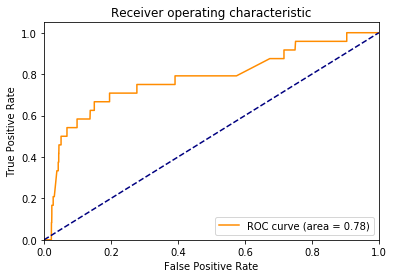

In [34]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()